# Medical Imaging

### 04 April 2022

### Lab 2

Consider the formation using a 1st generation scanner of a CT image of the modified Shepp-Logan phantom, which approximately models X-ray attenuation in a human head.
Note: for this lab you will need the scikit-image processing toolbox.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1. Generate the modified Shepp-Logan phantom using $ \texttt{shepp_logan_phantom} $. Use the function $ \texttt{rescale} $ to get a 256x256 dimension.

In [3]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

In [4]:
image = shepp_logan_phantom()
imgX, imgY = image.shape
image = rescale(image, scale=(256/imgX, 256/imgY))

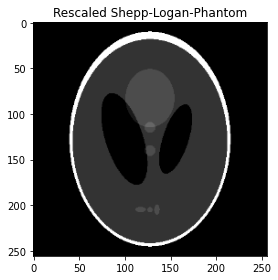

In [5]:
plt.figure("Shepp-Logan-Phantom")
plt.title("Rescaled Shepp-Logan-Phantom")
plt.imshow(image, cmap="gray")
plt.tight_layout()

#### 2. Simulate the sinogram obtained by collecting projections covering \[0;180\[° in steps of 1° using $ \texttt{radon} $).

In [6]:
theta = np.arange(0., 180., 1.)
sinogram = radon(image, theta=theta)
sinogram.shape

(256, 180)

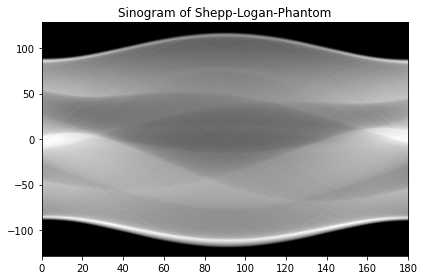

In [7]:
plt.figure("Sinogram of Shepp-Logan-Phantom")
plt.title("Sinogram of Shepp-Logan-Phantom")
plt.imshow(sinogram, cmap="gray", aspect="auto", extent=(0, len(theta), -sinogram.shape[0]/2, sinogram.shape[0]/2))
plt.tight_layout()

#### 3. Simulate the associated reconstructed image using filtered backprojection (using $ \texttt{iradon} $).

In [8]:
from skimage.transform import iradon

In [9]:
filtered_backprojection = iradon(sinogram, theta=theta, filter_name="shepp-logan")

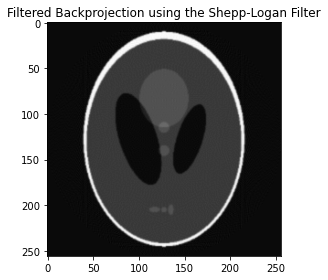

In [10]:
plt.figure("Filtered Backprojection using the Shepp-Logan Filter")
plt.title("Filtered Backprojection using the Shepp-Logan Filter")
plt.imshow(filtered_backprojection, cmap="gray")
plt.tight_layout()

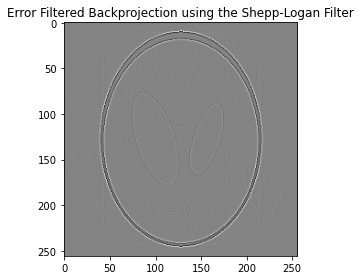

In [11]:
## Error of the filtered backprojection

error = filtered_backprojection - image
plt.figure("Error of Filtered Backprojection using the Shepp-Logan Filter")
plt.title("Error Filtered Backprojection using the Shepp-Logan Filter")
plt.imshow(error, cmap="gray")
plt.tight_layout()

#### 4. Repeat the simulations in 2. and 3. by covering: \[0;60\[°, \[0;90\[°, \[0;120\[° and \[0;360\[°, in steps of 1°.

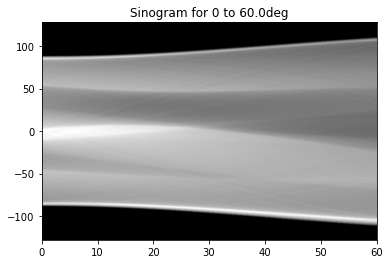

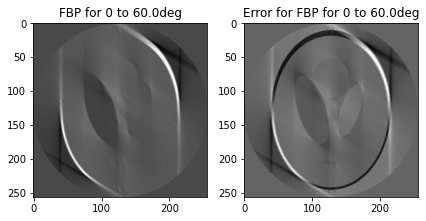

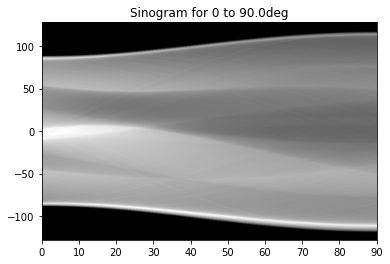

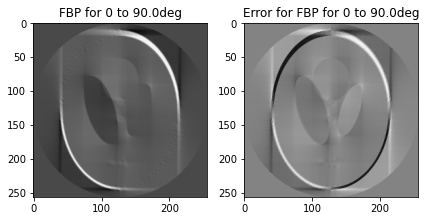

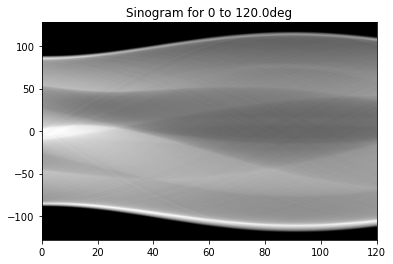

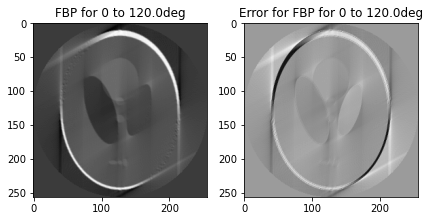

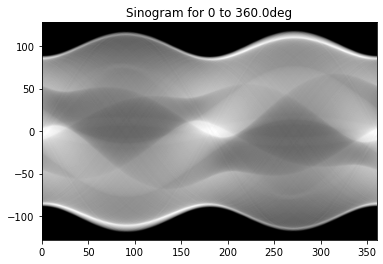

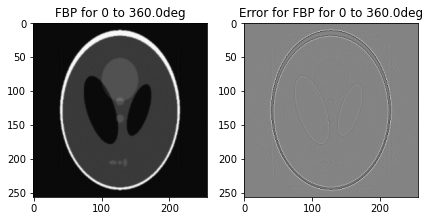

In [12]:
thetas = [60., 90., 120., 360.]       # Thetas array

for thetaMax in thetas:
    theta = np.arange(0., thetaMax, 1.)
    sinogram = radon(image, theta=theta)
    filtered_backprojection = iradon(sinogram, theta=theta, filter_name="shepp-logan")
    
    # Plot for Sinogram
    plt.figure("For " + str(thetaMax))
    plt.title("Sinogram for 0 to " + str(thetaMax) + "deg")
    plt.imshow(sinogram, cmap="gray", aspect="auto", extent=(0, thetaMax, -sinogram.shape[0]/2, sinogram.shape[0]/2))
    
    # Plot for Filtered back projection
    plt.figure("For " + str(thetaMax) + "2")
    plt.subplot(1, 2, 1)
    plt.title("FBP for 0 to " + str(thetaMax) + "deg")
    plt.imshow(filtered_backprojection, cmap="gray", aspect="equal")
    
    # Plot for Error of Filtered back projection
    plt.subplot(1, 2, 2)
    plt.title("Error for FBP for 0 to " + str(thetaMax) + "deg")
    error = filtered_backprojection - image
    plt.imshow(error, cmap="gray", aspect="equal")
    
    plt.tight_layout()

<h3 style="color:red">Artefacts are visible in these pictures as lesser angle is covered </h3>

#### 5. Repeat the simulations in 2. and 3. by covering \[0;180\[°, in steps of 0.5, 5 and 10°.

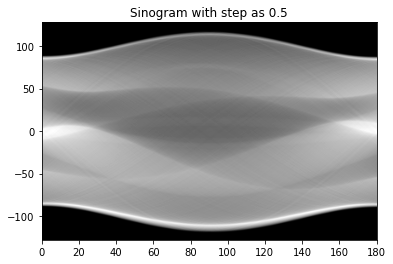

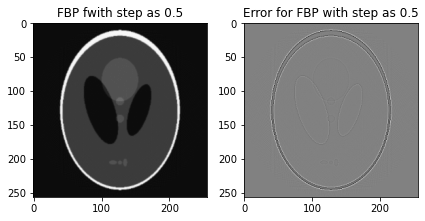

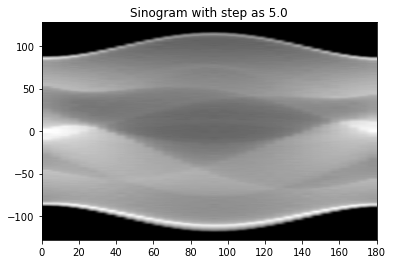

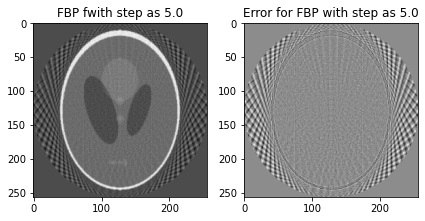

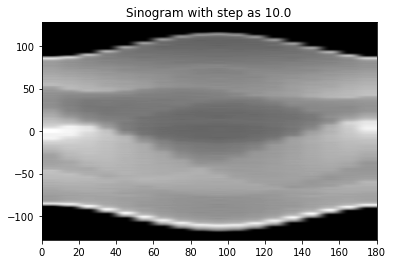

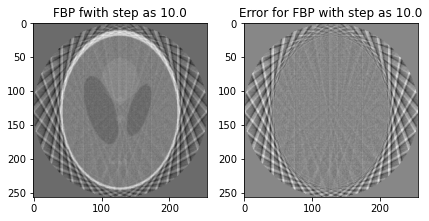

In [15]:
intervals = [0.5, 5., 10.]           # Intervals array

for interval in intervals:
    theta = np.arange(0., 180., interval)
    sinogram = radon(image, theta=theta)
    filtered_backprojection = iradon(sinogram, theta=theta, filter_name= "ramp")
    
    # Plot for Sinogram
    plt.figure("For " + str(interval))
    plt.title("Sinogram with step as " + str(interval))
    plt.imshow(sinogram, cmap="gray", aspect="auto", extent=(0, 180, -sinogram.shape[0]/2, sinogram.shape[0]/2))
    
    # Plot for Filtered back projection
    plt.figure("For " + str(interval) + "2")
    plt.subplot(1, 2, 1)
    plt.title("FBP fwith step as " + str(interval))
    plt.imshow(filtered_backprojection, cmap="gray", aspect="equal")
    
    # Plot for Error of Filtered back projection
    plt.subplot(1, 2, 2)
    plt.title("Error for FBP with step as " + str(interval))
    error = filtered_backprojection - image
    plt.imshow(error, cmap="gray", aspect="equal")
    
    plt.tight_layout()

<h3 style="color:blue">Artefacts are visible in these pictures as lesser intervals of angles is covered </h3>

#### 6. Repeat the simulations in 2. using the original angles, by adding noise to the projection data (using the $ \texttt{random.poisson} $  function of the $ \texttt{numpy} $ library), considering a maximum number of counts per pixel of $ 10^3  $ photons.

##### Note: as in this case noise follows the Poisson distribution, it depends on the signal level, so the output of the noise generation function will already correspond to the noisy sinogram. Prior to applying this function, you should rescale your sinogram intensities to the \[0, 255\] interval and convert the images to uint8 type (8-bit unsigned integers) to make the noise more noticeable.

In [128]:
theta = np.arange(0., 180., 1.)
sinogram = radon(image, theta=theta)

# Converting to 255 scale 
sinogram_norm = (sinogram / max(sinogram.flatten())) * 255
sinogram_norm = sinogram_norm.astype("uint8")
sinogram_noise = np.random.poisson(sinogram_norm)

# Converting to 10^3 photons
sinogram_noise_1000 = (sinogram_noise / max(sinogram_noise.flatten())) * 1000


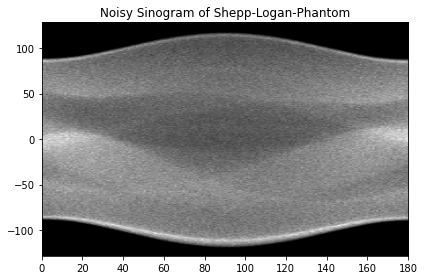

In [129]:
plt.figure("Noisy Sinogram of Shepp-Logan-Phantom")
plt.title("Noisy Sinogram of Shepp-Logan-Phantom")
plt.imshow(sinogram_noise_1000, cmap="gray", aspect="auto", extent=(0, len(theta), -sinogram_noise_1000.shape[0]/2, sinogram_noise_1000.shape[0]/2))
plt.tight_layout()

#### 7. Now reconstruct the image from the noisy projection data using $ \texttt{iradon} $ (with the original ramp, i.e. Ram-Lak, filter).

In [130]:
filtered_backprojection_rl = iradon(sinogram_noise_1000, theta=theta, filter_name="ramp")

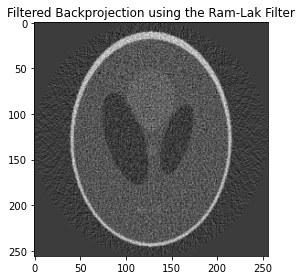

In [131]:
plt.figure("Filtered Backprojection using the Ram-Lak Filter")
plt.title("Filtered Backprojection using the Ram-Lak Filter")
plt.imshow(filtered_backprojection_rl, cmap="gray")
plt.tight_layout()

#### 8. Repeat 7, by replacing the original Ram-Lak filter by modified filters (available in $ \texttt{iradon} $ ), and explain the results as a function of their different frequency responses.

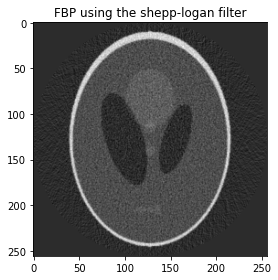

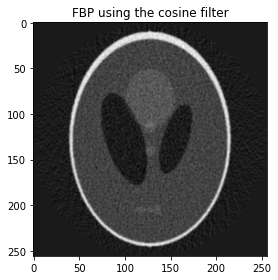

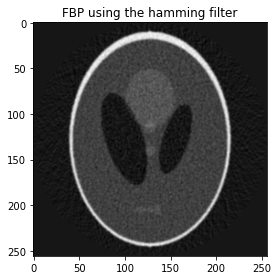

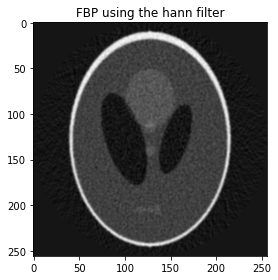

In [127]:
filters = ['shepp-logan', 'cosine', 'hamming', 'hann']
for bp_filter in filters:
    fbp_noise = iradon(sinogram_noise_1000, theta=theta, filter_name=bp_filter)
    plt.figure("Filtered Backprojection using the " + bp_filter + " filter")
    
    plt.title("FBP using the " + bp_filter + " filter")
    plt.imshow(fbp_noise, cmap="gray")
        
#     plt.subplot(1, 2, 1)
#     plt.suptitle(bp_filter)
#     plt.title("FBP using the " + bp_filter + " filter")
#     plt.imshow(fbp_noise, cmap="gray")
    
#     plt.subplot(1, 2, 2)
#     error =  fbp_noise - rescale(shepp_logan_phantom(), scale=(256/imgX, 256/imgY))
#     plt.title("Error of FBP with Noise")
#     plt.imshow(error, cmap="gray")
    
    plt.tight_layout()


In [132]:
from skimage.transform.radon_transform import _get_fourier_filter

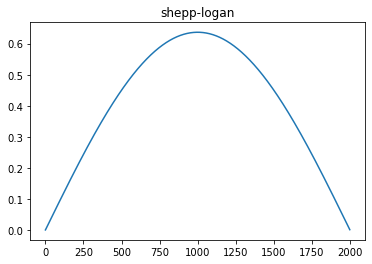

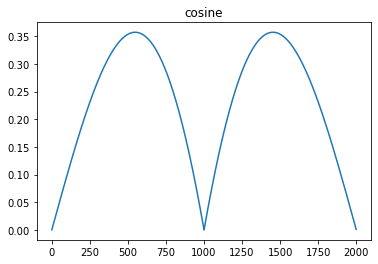

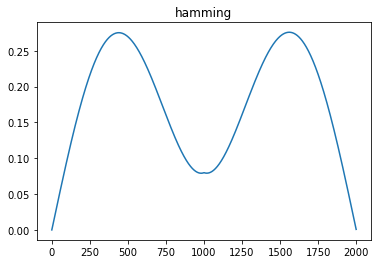

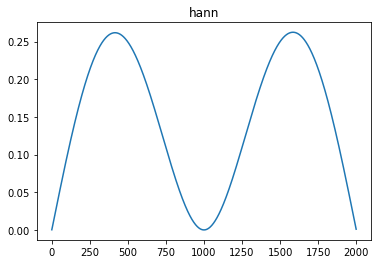

In [133]:
for ix, f in enumerate(filters):
    plt.figure(f)
    plt.title(f)
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)


In [122]:
# fbp_noise_rl = iradon(sinogram_noise_1000, theta=theta, filter_name="ramp")
# fbp_noise_hann = iradon(sinogram_noise_1000, theta=theta, filter_name="hann")
# error = fbp_noise_hann - fbp_noise_rl

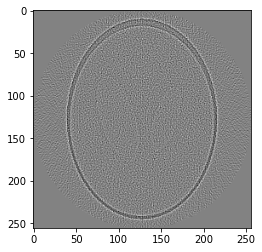

In [123]:
# plt.imshow(error, cmap="gray")